# Анализ данных в задаче кредитного скоринга

In [2]:
%pylab inline
import pandas as pd
from scipy import stats
import scipy
from statsmodels.stats.proportion import proportion_confint

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv('credit_card_default_analysis.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Задание 1.
 Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: 
* a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки 
* b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. 

Значимы ли полученные результаты с практической точки зрения ?

In [5]:
data.loc[data.MARRIAGE == 0, 'MARRIAGE'] = 'Not Answered'
data.loc[data.MARRIAGE == 1, 'MARRIAGE'] = 'Married'
data.loc[data.MARRIAGE == 2, 'MARRIAGE'] = 'Not Married'
data.loc[data.MARRIAGE == 3, 'MARRIAGE'] = 'No data'

data.loc[data.SEX == 2, 'SEX'] = 0

data_default_1 = data[data['default'] == 1]
data_default_0 = data[data['default'] == 0]

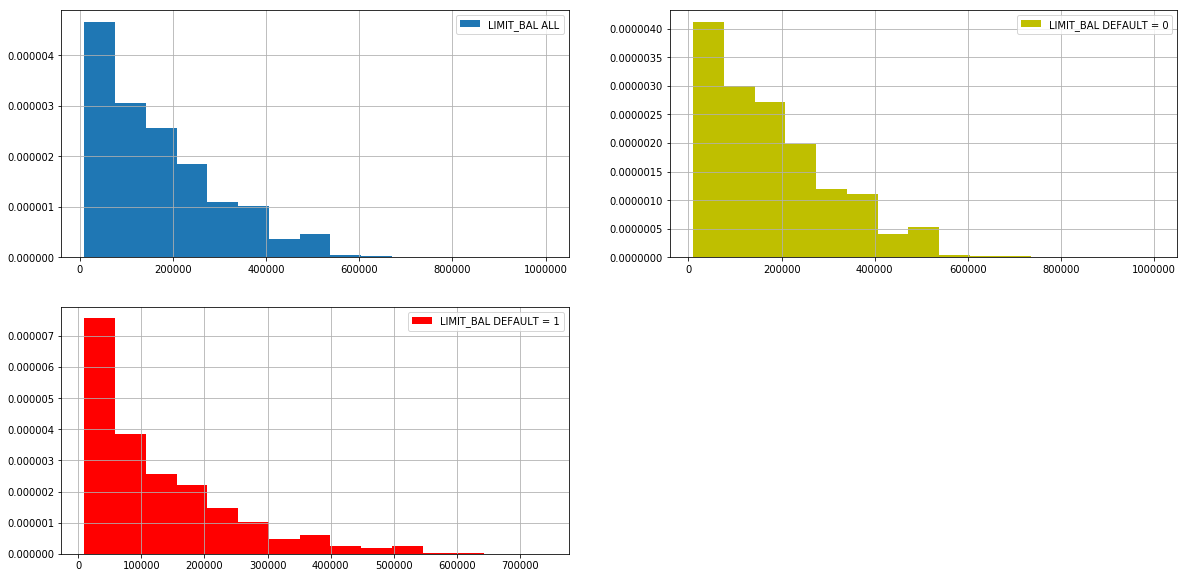

In [6]:
plt.figure(figsize(20, 10))
ax = plt.subplot(2,2,1)
data.LIMIT_BAL.hist(bins = 15, label = 'LIMIT_BAL ALL', normed=True)
pylab.legend()

ax = plt.subplot(2,2,2)
data_default_0.LIMIT_BAL.hist(bins = 15, color = 'y', normed=True, label = 'LIMIT_BAL DEFAULT = 0')
pylab.legend()

ax = plt.subplot(2, 2, 3)
data_default_1.LIMIT_BAL.hist(bins = 15, color = 'r', normed=True, label = 'LIMIT_BAL DEFAULT = 1')
pylab.legend()

pylab.show()

In [7]:
print 'Медиана лимита при DEFAULT = 0: %f' % data_default_0.LIMIT_BAL.median()
print 'Медиана лимита при DEFAULT = 1: %f' % data_default_1.LIMIT_BAL.median()

Медиана лимита при DEFAULT = 0: 150000.000000
Медиана лимита при DEFAULT = 1: 90000.000000


#### Визуально сложно сказать какое это распределение. Для сложных статистик типа медианы обычно используют бутстреп.

In [8]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [9]:
np.random.seed(0)

default_0_median_medians = map(np.median, get_bootstrap_samples(data_default_0.LIMIT_BAL.values, 1000))
default_1_median_medians = map(np.median, get_bootstrap_samples(data_default_1.LIMIT_BAL.values, 1000))

print "95% доверительный интервал при DEFAULT = 0:",  stat_intervals(default_0_median_medians, 0.05)
print "95% доверительный интервал при DEFAULT = 1:",  stat_intervals(default_1_median_medians, 0.05)

95% доверительный интервал при DEFAULT = 0: [ 150000.  150000.]
95% доверительный интервал при DEFAULT = 1: [ 80000.  90000.]


In [10]:
delta_median = map(lambda x: x[1] - x[0], zip(default_1_median_medians, default_0_median_medians))
print "95% доверительный интервал для разности:",  stat_intervals(delta_median, 0.05)

95% доверительный интервал для разности: [ 60000.  70000.]


### Ответ a): Медианные значения кредитного лимита при возврате и невозврате значительное отличаются

Далее, используем критерий Манна-Уитни чтобы проверить гипотезу о равенстве распределений.

In [11]:
stats.mannwhitneyu(data_default_0.LIMIT_BAL.values, data_default_1.LIMIT_BAL.values)

MannwhitneyuResult(statistic=59257217.5, pvalue=6.1277429091116516e-190)

### Ответ b): Гипотеза о равенстве распределений отвергается

### С практической точки зрения результаты значимы. Кредитный лимит у тех кто вернул кредит и тех, кто не вернул кредит значительно отличаются. Кредитный лимит назначает банк, поэтому может быть здесь обратная связь. Кредитный лимит был понижен или не увеличен у тех кто просрочил выплаты. 

## Задание 2

Пол (SEX): Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)

In [12]:
data_default_0.SEX.value_counts()

0    14349
1     9015
Name: SEX, dtype: int64

In [13]:
data_default_1.SEX.value_counts()

0    3763
1    2873
Name: SEX, dtype: int64

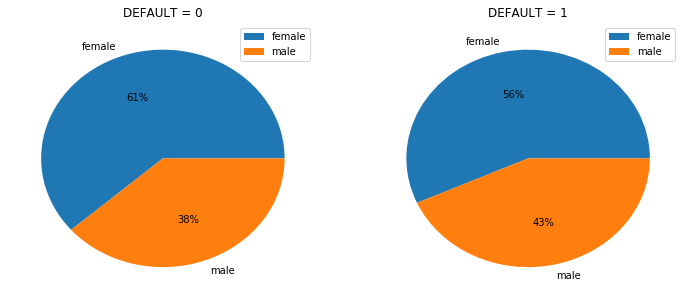

In [14]:
plt.figure(figsize(12, 5))
ax = plt.subplot(1,2,1)
plt.pie(data_default_0.groupby(['SEX']).size(), labels=['female', 'male'], autopct='%i%%')
plt.title("DEFAULT = 0")
pylab.legend()

ax = plt.subplot(1,2,2)
plt.pie(data_default_1.groupby(['SEX']).size(), labels=['female', 'male'], autopct='%i%%')
plt.title("DEFAULT = 1")
pylab.legend()

pylab.show()

#### Визуально гендерный состав отличается не сильно. Но необходима строкая проверка. Сделаем интервальную оценку.

$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [284]:
conf_interval_default_0 = proportion_confint(sum(data_default_0.SEX), data_default_0.shape[0], method = 'normal')
conf_interval_default_1 = proportion_confint(sum(data_default_1.SEX), data_default_1.shape[0], method = 'normal')

In [285]:
print 'Интервал при DEFAULT = 0 [%f, %f]' % conf_interval_default_0
print 'Интервал при DEFAULT = 1 [%f, %f]' % conf_interval_default_1

Интервал при DEFAULT = 0 [0.379608, 0.392092]
Интервал при DEFAULT = 1 [0.421020, 0.444863]


#### Интервалы не пересекаются

#### Проверим интревал разности

   | $X_1$ | $X_2$  
  ------------- | -------------|
  1  | a | b 
  0  | c | d 
  $\sum$ | $n_1$| $n_2$
  
$$ \hat{p}_1 = \frac{a}{n_1}$$

$$ \hat{p}_2 = \frac{b}{n_2}$$


$$\text{Доверительный интервал для }p_1 - p_2\colon \;\; \hat{p}_1 - \hat{p}_2 \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2}}$$

In [286]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [287]:
print "Интервал разности: [%f, %f]" % proportions_confint_diff_ind(data_default_0.SEX, data_default_1.SEX)

Интервал разности: [-0.060548, -0.033635]


#### Судя по доверительному интервалу разности гендерный состав отличается (Ноль не входит в интервал). 


#### Также выполним проверку с помощью Z-критерия для разности долей независимых выборок

In [288]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [289]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [290]:
print "p-value:", proportions_diff_z_test(proportions_diff_z_stat_ind(data_default_0.SEX, data_default_1.SEX))

p-value: 4.47286652161e-12


### Ответ: Гипотеза о равенстве гендерного состава отклоняется в пользу двусторонней альтернативы.

## Задание 3

Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ?

In [184]:
data.loc[data.EDUCATION == 0, 'EDUCATION'] = 'Doctor'
data.loc[data.EDUCATION == 1, 'EDUCATION'] = 'Master'
data.loc[data.EDUCATION == 2, 'EDUCATION'] = 'Bachelor'
data.loc[data.EDUCATION == 3, 'EDUCATION'] = 'High School'
data.loc[data.EDUCATION == 4, 'EDUCATION'] = 'Elementary'
data.loc[data.EDUCATION == 5, 'EDUCATION'] = 'Other'
data.loc[data.EDUCATION == 6, 'EDUCATION'] = 'No data'

data.EDUCATION.value_counts()

Bachelor       14030
Master         10585
High School     4917
Other            280
Elementary       123
No data           51
Doctor            14
Name: EDUCATION, dtype: int64

#### Построим таблицу сопряженности.

In [188]:
edu_contingency_table = pd.pivot_table(
    data[["EDUCATION", "default", "LIMIT_BAL"]],
    values=["LIMIT_BAL"],
    index=["EDUCATION"],
    columns=["default"],
    fill_value = 0,
    aggfunc='count')

In [189]:
edu_contingency_table

LIMIT_BAL      
default             0     1
EDUCATION                  
Bachelor        10700  3330
Doctor             14     0
Elementary        116     7
High School      3680  1237
Master           8549  2036
No data            43     8
Other             262    18

In [194]:
def make_hist(column):
    test = data.groupby([column,'default'])['default'].count().unstack()
    test.div(test.sum(1).astype(int), axis=0).plot(kind='bar', stacked=False).plot(kind='bar', stacked=False)

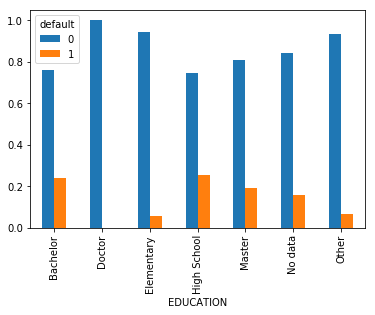

In [195]:
make_hist('EDUCATION')

#### Визуально заметно что образование влияет на вероятнось дефолта. Люди с образование "High School" наиболее склонны к дефолту, а вот доктора наук не склонны совсем. Однако нужно понимать что докторов в выборке всего 14.
#### Проверим критерием Хи-квадрат:
#### H0: образование не влияет на то, вернет ли человек долг
#### H1: образование влияет на то, вернет ли человек долг

In [196]:
chi2, p, dof, expected = scipy.stats.chi2_contingency(edu_contingency_table)

In [197]:
p

1.2332626245415958e-32

#### Нулевая гипотеза о том, что образование не играет роли отвергается

In [198]:
expected

array([[  1.09265640e+04,   3.10343600e+03],
       [  1.09032000e+01,   3.09680000e+00],
       [  9.57924000e+01,   2.72076000e+01],
       [  3.82935960e+03,   1.08764040e+03],
       [  8.24359800e+03,   2.34140200e+03],
       [  3.97188000e+01,   1.12812000e+01],
       [  2.18064000e+02,   6.19360000e+01]])

#### Построим таблицу сопряженности для разности между ожидаемым и реальным

In [271]:
diff = expected-edu_contingency_table
diff

LIMIT_BAL          
default             0         1
EDUCATION                      
Bachelor     226.5640 -226.5640
Doctor        -3.0968    3.0968
Elementary   -20.2076   20.2076
High School  149.3596 -149.3596
Master      -305.4020  305.4020
No data       -3.2812    3.2812
Other        -43.9360   43.9360

#### Модифицируем таблицу, разделим разность на сумму наблюдений для каждого образования

In [272]:
scaled_diff=diff.values
for i in range(7):
    scaled_diff[i,0] = diff.values[i, 0] / sum(edu_contingency_table.values[i])
    scaled_diff[i,1] = diff.values[i, 1] / sum(edu_contingency_table.values[i])
scaled_diff

array([[ 0.01614854, -0.01614854],
       [-0.2212    ,  0.2212    ],
       [-0.16428943,  0.16428943],
       [ 0.03037616, -0.03037616],
       [-0.02885234,  0.02885234],
       [-0.06433725,  0.06433725],
       [-0.15691429,  0.15691429]])

## Ответ: Образование - доктор - наилучший индикатор того, что человек вернет долг. Образование - бакалавр - наилучший индикатор того, что человек не вернет долг.

## Задание 4
Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

In [314]:
data_default_0.MARRIAGE.value_counts()

Not Married     12623
Married         10453
No data           239
Not Answered       49
Name: MARRIAGE, dtype: int64

In [315]:
data_default_1.MARRIAGE.value_counts()

Not Married     3341
Married         3206
No data           84
Not Answered       5
Name: MARRIAGE, dtype: int64

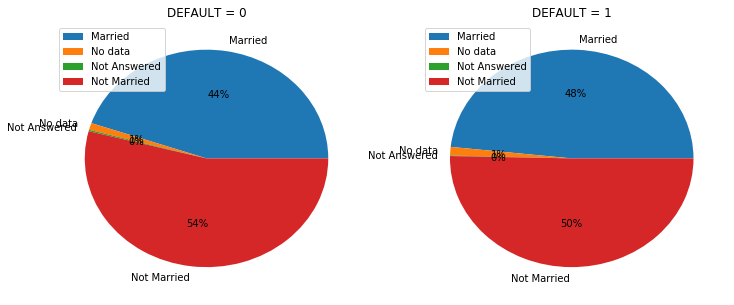

In [313]:
plt.figure(figsize(12, 5))
ax = plt.subplot(1,2,1)
plt.pie(
    data_default_0.groupby(['MARRIAGE']).size(), 
    labels=data_default_0.groupby(['MARRIAGE']).size().index.values, 
    autopct='%i%%'
)
plt.title("DEFAULT = 0")
pylab.legend(loc="upper left")

ax = plt.subplot(1,2,2)
plt.pie(
    data_default_1.groupby(['MARRIAGE']).size(), 
    labels=data_default_1.groupby(['MARRIAGE']).size().index.values, 
    autopct='%i%%'
)
plt.title("DEFAULT = 1")
pylab.legend(loc="upper left")

pylab.show()

#### Визуально похоже что среди людей неотдавших кредит женатых больше за счет неженатых. "Нет данных" и "Отказываюсь отвечать" на одном уровне. Проверим формально с помощью критерия Хи-квадрат, как и для образования.
#### H0: Семейное положение не влияет на то, вернет ли человек долг
#### H1: Семейное положение влияет на то, вернет ли человек долг

In [324]:
marriage_contingency_table = pd.pivot_table(
    data[["MARRIAGE", "default", "LIMIT_BAL"]],
    values=["LIMIT_BAL"],
    index=["MARRIAGE"],
    columns=["default"],
    fill_value = 0,
    aggfunc='count')

In [325]:
marriage_contingency_table

LIMIT_BAL      
default              0     1
MARRIAGE                    
Married          10453  3206
No data            239    84
Not Answered        49     5
Not Married      12623  3341

In [326]:
chi2, p, dof, expected = scipy.stats.chi2_contingency(marriage_contingency_table)

In [327]:
p

8.8258624575773752e-08

#### гипотеза H0 отклоняется на уровне значимости 0.05, семейный статус влияет на то, вернет ли человек долг

In [328]:
diff = expected - marriage_contingency_table
diff

LIMIT_BAL          
default              0         1
MARRIAGE                        
Married       184.6292 -184.6292
No data        12.5524  -12.5524
Not Answered   -6.9448    6.9448
Not Married  -190.2368  190.2368

## Ответ: Семейный статус влияет на то, вернет ли человек долг

## Задание 5
Возраст (AGE): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: a) о равенстве медианных значений возрастов людей b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

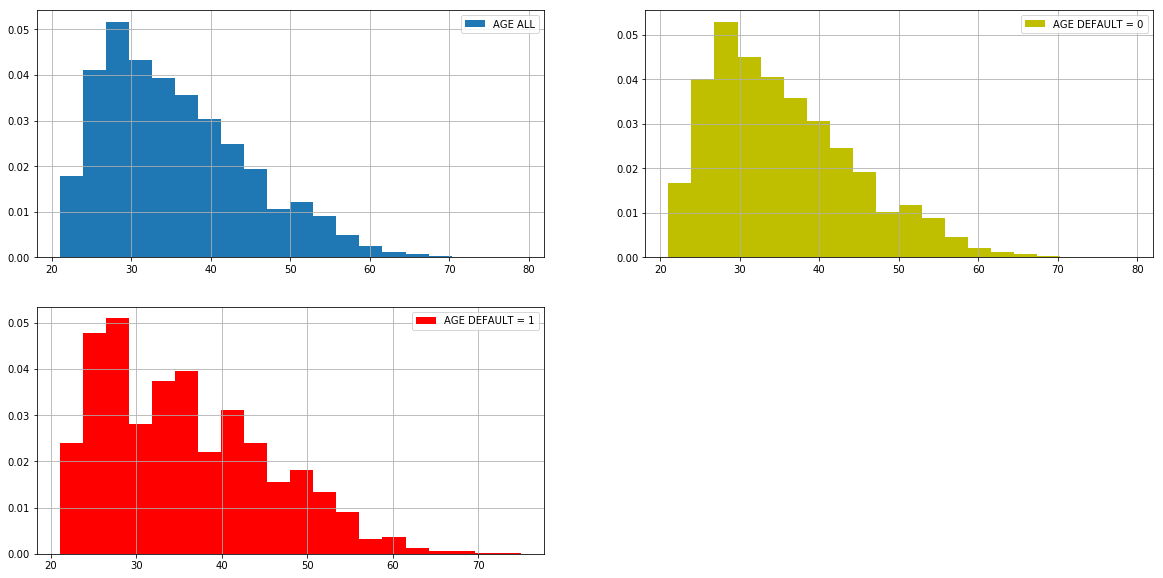

In [343]:
plt.figure(figsize(20, 10))
ax = plt.subplot(2,2,1)
data.AGE.hist(bins = 20, label = 'AGE ALL', normed=True)
pylab.legend()

ax = plt.subplot(2,2,2)
data_default_0.AGE.hist(bins = 20, color = 'y', normed=True, label = 'AGE DEFAULT = 0')
pylab.legend()

ax = plt.subplot(2, 2, 3)
data_default_1.AGE.hist(bins = 20, color = 'r', normed=True, label = 'AGE DEFAULT = 1')
pylab.legend()

pylab.show()

In [345]:
print 'Медиана возраста при DEFAULT = 0: %f' % data_default_0.AGE.median()
print 'Медиана возраста при DEFAULT = 1: %f' % data_default_1.AGE.median()

Медиана возраста при DEFAULT = 0: 34.000000
Медиана возраста при DEFAULT = 1: 34.000000


In [346]:
np.random.seed(0)

default_0_age_median = map(np.median, get_bootstrap_samples(data_default_0.AGE.values, 1000))
default_1_age_median = map(np.median, get_bootstrap_samples(data_default_1.AGE.values, 1000))

print "95% доверительный интервал при DEFAULT = 0:",  stat_intervals(default_0_age_median, 0.05)
print "95% доверительный интервал при DEFAULT = 1:",  stat_intervals(default_1_age_median, 0.05)

95% доверительный интервал при DEFAULT = 0: [ 34.  34.]
95% доверительный интервал при DEFAULT = 1: [ 34.  35.]


In [347]:
delta_median = map(lambda x: x[1] - x[0], zip(default_1_age_median, default_0_age_median))
print "95% доверительный интервал для разности:",  stat_intervals(delta_median, 0.05)

95% доверительный интервал для разности: [-1.  0.]


#### Нуль входит в 95% доверительный интервал для разности медиан, поэтому нулевая гипотеза H0 не отклоняется.
## Ответ a) Медианные значения возрастов в двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) можно считать одинаковыми


Далее, используем критерий Манна-Уитни чтобы проверить гипотезу о равенстве распределений.

In [349]:
stats.mannwhitneyu(data_default_0.AGE.values, data_default_1.AGE.values)

MannwhitneyuResult(statistic=76966879.5, pvalue=0.18625177174493079)

## Ответ b) С помощью критерия Манна-Уитни мы подтверждаем равенство распределенией возрастов отдавших кредит и не отдавших кредит.


#### С практической точки зрения мы имеем информацию от том что возраст не влияет на вероятность дефолта.